# Origin's arcs infrastructure analysis

This code allows you to estimate the following variables related to the origin's infrastructure. 
O_LCycle = Length of cycle paths (in kilometers) within a 600m buffer around the trip origin. 
O_Hls = High levels of stress. Length of major roads (in kilometers) within a 600m buffer around the trip origin.
O_Lls = Low levels of stress. Length of minor roads (in kilometers) within a 600m buffer around the trip origin.
O_l80 = Length of 80km/h roads (in kilometers) within a 600m buffer around the trip origin.
O_l60 = Length of 60km/h roads (in kilometers) within a 600m buffer around the trip origin.
O_l40 = Length of 40km/h roads (in kilometers) within a 600m buffer around the trip origin.
O_l30 = Length of 30km/h roads (in kilometers) within a 600m buffer around the trip origin.
O_l5 = Length of 5km/h roads (in kilometers) within a 600m buffer around the trip origin.

All the arcs related to each origin are assumed to be previously estimated.  

## Importing libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import math

print ("it works")

### Example for only one route 

In [3]:
route = 1002
db = gpd.read_file('../Shapes/start_arcs600/R' +"%s" % (route) +'_start_arcs600.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,OBJECTID,bridge,from_,highway,name,oneway,osmid,to,ID_PhD,Cyclypath,...,vc80,vc60,vc40,vc30,vc5,Hle,Lle,bnocycle,bcycle,geometry
0,24623,None,4065012367,residential,None,False,404226839,4065012361,24623,0,...,0,0,0.000000,62,0,0.000000,62,1,0,LINESTRING Z (837192.1365999999 1189216.0274 0...
1,1653,None,1834486922,secondary,Calle 20 E,True,30023746,330558734,1653,0,...,0,0,36.857127,0,0,36.857127,0,1,0,LINESTRING Z (836633.4518999998 1189602.7567 0...
2,1654,None,1834486925,residential,Calle 20d,True,30023756,1027336729,1654,0,...,0,0,0.000000,12,0,0.000000,12,1,0,LINESTRING Z (836613.8926999997 1189551.681299...
3,1655,None,3292845893,residential,Calle 20d,True,30023756,1834486925,1655,0,...,0,0,0.000000,35,0,0.000000,35,1,0,LINESTRING Z (836613.8926999997 1189551.681299...
4,23419,None,563801649,tertiary,Calle 110,False,44091557,563801706,23419,0,...,0,0,0.000000,63,0,0.000000,63,1,0,LINESTRING Z (836749.7348999996 1188697.0539 0...


In [4]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 46 columns):
OBJECTID      201 non-null int64
bridge        0 non-null object
from_         201 non-null object
highway       201 non-null object
name          180 non-null object
oneway        201 non-null object
osmid         201 non-null object
to            201 non-null object
ID_PhD        201 non-null object
Cyclypath     201 non-null int64
Ped_path      201 non-null int64
X_from        201 non-null float64
Y_from        201 non-null float64
Z_from        201 non-null float64
X_to          201 non-null float64
Y_to          201 non-null float64
Z_to          201 non-null float64
slope         201 non-null float64
speed         201 non-null float64
v_80          201 non-null float64
v_60          201 non-null float64
v_40          201 non-null float64
v_30          201 non-null float64
v_5           201 non-null float64
Long          201 non-null float64
Cycle_long    201 non-null f

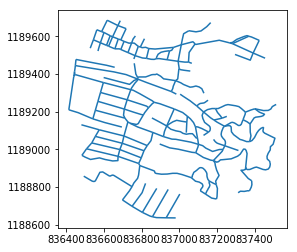

In [5]:
db.plot()

In [7]:
O_LCycle = (db['Cycle_long']).sum()/1000 
O_Hls = (db['Hle']).sum()/1000
O_Lls = (db['Lle']).sum()/1000
O_l80 = (db['vc80']).sum()/1000
O_l60 = (db['vc60']).sum()/1000
O_l40 = (db['vc40']).sum()/1000
O_l30 = (db['vc30']).sum()/1000
O_l5 = (db['vc5']).sum()/1000

In [8]:
print ("O_LCycle:" + str(O_LCycle))
print ("O_l80:" + str(O_l80))
print ("O_l60:" + str(O_l60))
print ("O_l40:" + str(O_l40))
print ("O_l30:" + str(O_l30))
print ("O_l5:" + str(O_l5))
print ("O_Hls:" + str(O_Hle))
print ("O_Lls:" + str(O_Lle))

O_LCycle:0.0
l80:0.0
l60:0.3
l40:3.3757394596000005
l30:13.217
l5:0.148
Hle:3.6760471943399997
Lle:13.365


In [10]:
results = pd.DataFrame ({
        "route":[route],
        "O_LCycle":[O_LCycle],
        "O_l80":[O_l80],
        "O_l60":[O_l60],
        "O_l40":[O_l40],
        "O_l30":[O_l30],
        "O_l5":[O_l5],
        "O_Hls":[O_Hls],
        "O_Lls":[O_Lls]})
results.to_csv('../Tables/OUT/R' +"%s" %(route)+'_start_infra600.txt',index=False, header=True)

### Origin's arcs infrastructure analysis for All routes 

The code requires the list of the origin points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [11]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

In [97]:
for i in routes:
    db = gpd.read_file('../Shapes/start_arcs600/R' +"%s" % (i) +'_start_arcs600.shp')
    O_LCycle = (db['Cycle_long']).sum()/1000 
    O_Hls = (db['Hle']).sum()/1000
    O_Lls = (db['Lle']).sum()/1000
    O_l80 = (db['vc80']).sum()/1000
    O_l60 = (db['vc60']).sum()/1000
    O_l40 = (db['vc40']).sum()/1000
    O_l30 = (db['vc30']).sum()/1000
    O_l5 = (db['vc5']).sum()/1000
    
    results = pd.DataFrame ({
            "route":[i],
            "O_LCycle":[O_LCycle],
            "O_l80":[O_l80],
            "O_l60":[O_l60],
            "O_l40":[O_l40],
            "O_l30":[O_l30],
            "O_l5":[O_l5],
            "O_Hls":[O_Hle],
            "O_Lls":[O_Lle]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_start_infra600.txt',index=False, header=True)

This part of the code summarizes the Origin's arcs infrastructure in only one table. Please copy it to a text file and save. 

In [98]:
print ('route,O_LCycle,O_l80,O_l60,O_l40,O_l30,O_l5,O_Hls,O_Lls')
for i in routes:
    df=np.loadtxt('../Tables/OUT/R' +"%s" %(ruta)+'_start_infra600.txt', delimiter=',',skiprows=1)
    print ((df[0]),(df[1]),(df[2]),(df[3]),(df[4]),(df[5]),(df[6]),(df[7]),(df[8])) 

ruta,O_Lstreet,O_sttdens,O_LCycle,O_lv80,O_lv60,O_lv40,O_lv30,O_lv5,O_Hle,O_Lle
(1002.0, 17.118597135000002, 15.1361630713, 0.0, 0.0, 0.0, 3.3757394596000001, 13.0, 0.0, 3.6760471943400002, 13.0)
(1006.0, 18.402484423299999, 16.271368673000001, 1.15521088476, 0.0, 0.0, 6.2375008778599996, 9.0, 0.0, 6.6987075942400001, 10.0)
(1009.0, 12.7949611019, 11.3132294779, 0.0, 1.0, 2.0, 2.1802653110999999, 5.0, 1.0, 5.9575736465300002, 6.0)
(1013.0, 18.292751286000001, 16.174343277399998, 0.0, 0.0, 0.0, 5.22262478667, 12.0, 0.0, 6.1204208390900003, 12.0)
(10291.0, 17.076605811, 15.0990345892, 2.67643619553, 0.0, 2.0, 3.0513666017099998, 6.0, 1.0, 6.0918782203999999, 8.0)
(10292.0, 17.688586191100001, 15.6401440479, 2.53714973682, 1.0, 1.0, 2.6120236434300002, 8.0, 1.0, 5.2922870504599997, 9.0)
(1050.0, 15.4559300598, 13.6660426061, 0.0, 0.0, 2.0, 4.15100216042, 7.0, 0.0, 7.0082625105899998, 8.0)
(1052.0, 20.261263719399999, 17.914890412399998, 0.0, 0.0, 0.0, 6.1356579700099996, 13.0, 0.0, 6.1927